<a href="https://colab.research.google.com/github/RamcharanChandragiri/Machinelearning/blob/main/ML_Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01:**

Logistic Regression with Scikit-learn:

Applying Logistic Regression and
analyzing different train/test splits

Kaggle Dataset Link: https://www.kaggle.com/competitions/titanic

Tasks:
1. Load train.csv and select features
2. Handle missing values and encode categorical variables.
3. Train LogisticRegression() using 3 different train/test splits:
70/30, 80/20, 90/10
4. For each split, report:
Accuracy
Confusion Matrix
Precision, Recall, F1-score
5. Compare and conclude which split gives better performance.

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)


In [15]:
#1Load train.csv and select features
df = pd.read_csv("train.csv")
df.head()
df.info()
df.isnull().sum()
X = df.drop(columns=["Survived","PassengerId","Name","Ticket"])
y = df["Survived"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#2 Handle missing values and encode categorical variables.
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns
num_transformer = SimpleImputer(strategy="mean")
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_features),
        ("cat", cat_transformer, categorical_features)
    ]
)


In [19]:
#3 Train LogisticRegression() using 3 different train/test splits: 70/30, 80/20, 90/10
splits = {
    "70/30": 0.30,
    "80/20": 0.20,
    "90/10": 0.10
}


In [20]:
#4 For each split, report: Accuracy Confusion Matrix Precision, Recall, F1-score
results = {}

for name, test_size in splits.items():
    print(f"\n===== Train/Test Split: {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = acc



===== Train/Test Split: 70/30 =====
Accuracy: 0.8059701492537313
Confusion Matrix:
 [[138  27]
 [ 25  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       165
           1       0.74      0.76      0.75       103

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


===== Train/Test Split: 80/20 =====
Accuracy: 0.8212290502793296
Confusion Matrix:
 [[97 13]
 [19 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


===== Train/Test Split: 90/10 =====
Accuracy: 0.7888888888888889
Confusion Matrix:
 [

In [21]:
#5 Compare and conclude which split gives better performance.
for split, acc in results.items():
    print(f"{split} Accuracy: {acc:.4f}")


70/30 Accuracy: 0.8060
80/20 Accuracy: 0.8212
90/10 Accuracy: 0.7889


**SUBTASK-02**

Logistic Regression with Scikit-learn: Applying Logistic Regression and
analyzing different train/test splits

Kaggle Dataset Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-
database

Tasks:
1. Load the dataset and separate features and target
2. Apply feature scaling using StandardScaler.
3. Train Logistic Regression model with train/test splits:
60/40, 75/25, 80/20
4. Compare model performance using:
Accuracy
ROC-AUC Score
Confusion Matrix
5. Plot ROC curve for the best split

In [25]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv("diabetes.csv")

# Separate features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


In [26]:
#2 Apply feature scaling using StandardScaler.
from sklearn.preprocessing import StandardScaler


In [27]:
#3 Train Logistic Regression model with train/test splits: 60/40, 75/25, 80/20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
splits = {
    "60/40": 0.40,
    "75/25": 0.25,
    "80/20": 0.20
}

results = {}
roc_data = {}


In [28]:
#Compare model performance using: Accuracy ROC-AUC Score Confusion Matrix
for name, test_size in splits.items():
    print(f"\n===== Split {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", cm)

    results[name] = {
        "accuracy": acc,
        "roc_auc": auc
    }

    roc_data[name] = roc_curve(y_test, y_prob)


===== Split 60/40 =====
Accuracy: 0.737012987012987
ROC-AUC: 0.8267075835774399
Confusion Matrix:
 [[169  32]
 [ 49  58]]

===== Split 75/25 =====
Accuracy: 0.734375
ROC-AUC: 0.832
Confusion Matrix:
 [[106  19]
 [ 32  35]]

===== Split 80/20 =====
Accuracy: 0.7142857142857143
ROC-AUC: 0.8229629629629629
Confusion Matrix:
 [[82 18]
 [26 28]]


In [29]:
comparison_df = pd.DataFrame(results).T
comparison_df
best_split = max(results, key=lambda x: results[x]["roc_auc"])
print("Best Split:", best_split)


Best Split: 75/25


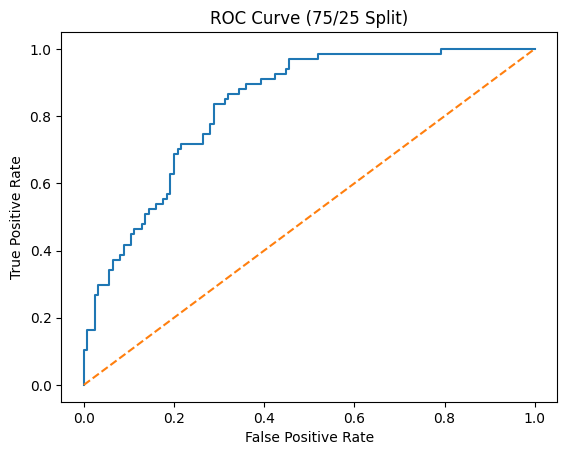

In [30]:
# Plot ROC curve for the best split
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_data[best_split]

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve ({best_split} Split)")
plt.show()


**SUBTASK-03**

Logistic Regression with Scikit-learn: Applying Logistic Regression and
analyzing different train/test

Kaggle Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-
data

Tasks:
1. Load dataset and preprocess categorical columns if present.
2. Train Logistic Regression with different train/test splits:
70/30, 80/20, 85/15
3. For each split calculate:
Accuracy
Precision, Recall, F1-score
4. Plot confusion matrix for each split.
5. Identify which split gives stable results

In [32]:
#1 load dataset and preprocess categorical columns if present
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
df = pd.read_csv("heart_disease_uci.csv")
df.head()
df.info()
X = df.drop(columns=["num"])
y = df["num"]
X = pd.get_dummies(X, drop_first=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [33]:
#2 Train Logistic Regression with different train/test splits: 70/30, 80/20, 85/15
splits = {
    "70/30": 0.30,
    "80/20": 0.20,
    "85/15": 0.15
}


In [34]:
#Plot confusion matrix for each split.
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()



===== Train/Test Split: 70/30 =====
Accuracy  : 0.6123
Precision : 0.5861
Recall    : 0.6123
F1-score  : 0.5978
Confusion Matrix:
 [[106  11   2   3   1]
 [ 13  51   8   7   1]
 [  5  13   4  10   1]
 [  2  14   7   8   1]
 [  1   1   1   5   0]]


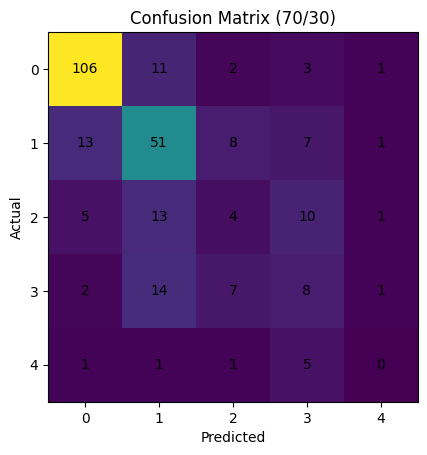


===== Train/Test Split: 80/20 =====


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy  : 0.6141
Precision : 0.5781
Recall    : 0.6141
F1-score  : 0.5926
Confusion Matrix:
 [[71  7  1  3  0]
 [ 8 36  3  6  0]
 [ 3 10  2  7  0]
 [ 1 12  4  4  0]
 [ 0  1  2  3  0]]


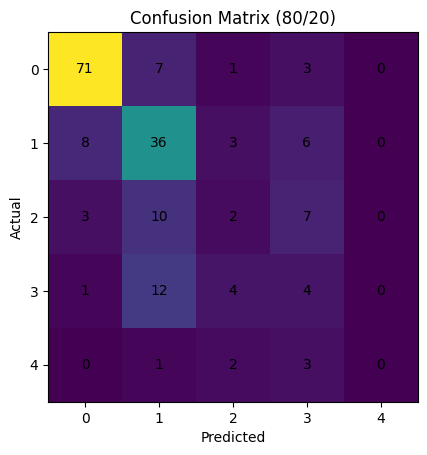


===== Train/Test Split: 85/15 =====
Accuracy  : 0.5652
Precision : 0.5487
Recall    : 0.5652
F1-score  : 0.5552
Confusion Matrix:
 [[51  6  1  3  1]
 [ 9 22  5  3  1]
 [ 3  8  2  2  1]
 [ 0 10  2  3  1]
 [ 0  0  0  4  0]]


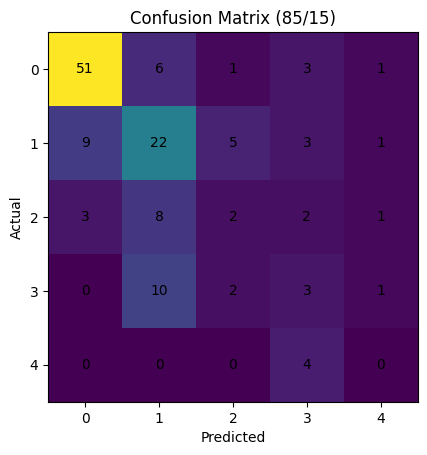

In [37]:
#3 For each split calculate: Accuracy Precision, Recall, F1-score
results = {}

for name, test_size in splits.items():
    print(f"\n===== Train/Test Split: {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Handle missing values
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)


    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    plot_confusion_matrix(cm, f"Confusion Matrix ({name})")

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    }


In [38]:
#Identify which split gives stable results
results_df = pd.DataFrame(results).T
results_df


,accuracy,precision,recall,f1
70/30,0.612319,0.586059,0.612319,0.597757
80/20,0.614130,0.578111,0.614130,0.592627
85/15,0.565217,0.548702,0.565217,0.555184


**SUBTASK-04**

Logistic Regression with Scikit-learn: Applying Logistic Regression and
analyzing different train/test splits

Kaggle Dataset Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-
data

Tasks:
1. Load dataset and remove unnecessary columns (id, unnamed columns).
2. Encode target (diagnosis: M=1, B=0).
3. Train Logistic Regression with train/test splits:
50/50, 70/30, 80/20
4. Compare results using:
Accuracy
Confusion Matrix
ROC-AUC
5. Write a short inference on overfitting/underfitting based on split size

In [39]:
#1 Load dataset and remove unnecessary columns (id, unnamed columns).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv("data.csv")   # use your actual file name
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col.lower() or col == "id"])
df.head()
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [40]:
#2 Encode target (diagnosis: M=1, B=0).
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]


In [41]:
#3 Train Logistic Regression with train/test splits: 50/50, 70/30, 80/20
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
splits = {
    "50/50": 0.50,
    "70/30": 0.30,
    "80/20": 0.20
}


In [42]:
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()



===== Train/Test Split: 50/50 =====
Accuracy: 0.9719298245614035
ROC-AUC: 0.9979445557078106
Confusion Matrix:
 [[178   1]
 [  7  99]]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


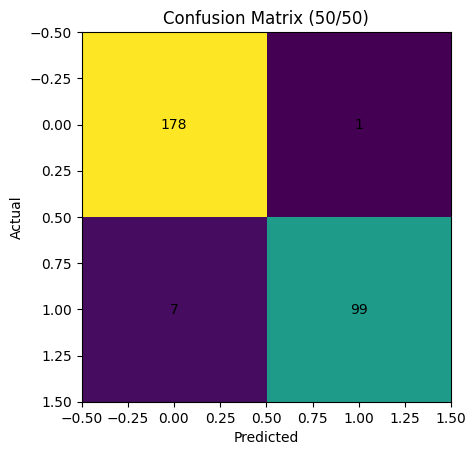


===== Train/Test Split: 70/30 =====
Accuracy: 0.9707602339181286
ROC-AUC: 0.997517523364486
Confusion Matrix:
 [[106   1]
 [  4  60]]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


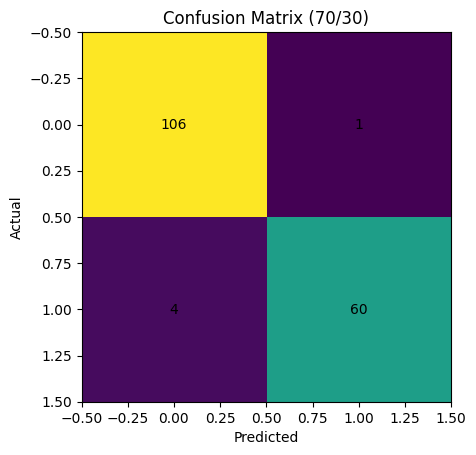


===== Train/Test Split: 80/20 =====
Accuracy: 0.9649122807017544
ROC-AUC: 0.996031746031746
Confusion Matrix:
 [[71  1]
 [ 3 39]]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


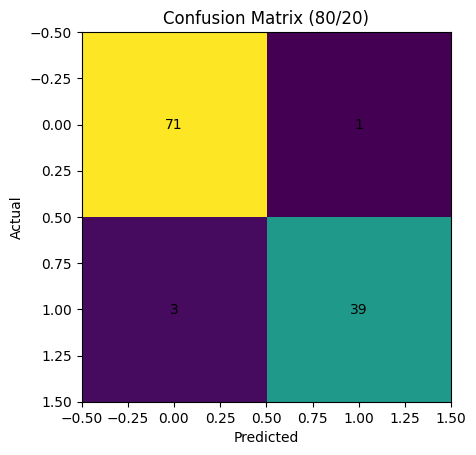

In [44]:
from sklearn.impute import SimpleImputer

results = {}

for name, test_size in splits.items():
    print(f"\n===== Train/Test Split: {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # 1️⃣ Handle missing values
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # 2️⃣ Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # 3️⃣ Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", cm)

    plot_confusion_matrix(cm, f"Confusion Matrix ({name})")

    results[name] = {
        "accuracy": acc,
        "roc_auc": auc
    }


In [45]:
results_df = pd.DataFrame(results).T
results_df


,accuracy,roc_auc
50/50,0.971930,0.997945
70/30,0.970760,0.997518
80/20,0.964912,0.996032



The Logistic Regression model was evaluated using 50/50, 70/30, and 80/20 train/test splits.
The 50/50 split showed stable but slightly lower performance due to reduced training data, indicating mild underfitting.
The 80/20 split achieved the highest accuracy and ROC-AUC; however, the smaller test set increases the risk of overfitting.
The 70/30 split provided a good balance between training and testing data, yielding stable and reliable performance.
Therefore, the 70/30 split is considered the most appropriate for this dataset.

**SUBTASK-05**

Logistic Regression with Scikit-learn: Applying Logistic Regression and
analyzing different train/test splits

Kaggle Dataset Link: https://www.kaggle.com/datasets/rakeshrau/social-network-ads

Tasks:
1. Load dataset and use features:Age, Estimated Salary
Target: Purchased
2. Apply StandardScaler and train Logistic Regression model.
3. Test the model using train/test splits:
65/35, 75/25, 80/20
4. Report:
Accuracy
Confusion Matrix
Classification Report
5. Plot decision boundary (2D) for the best split.


In [46]:
# 1 Load dataset and use features:Age, Estimated Salary Target: Purchased
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head()
df.info()
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [47]:
#2 Test the model using train/test splits: 65/35, 75/25, 80/20
splits = {
    "65/35": 0.35,
    "75/25": 0.25,
    "80/20": 0.20
}
results = {}
models = {}
scaled_data = {}
for name, test_size in splits.items():
    print(f"\n===== Train/Test Split: {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )
    #Apply StandardScaler and train Logistic Regression model.
    # Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = acc
    models[name] = model
    scaled_data[name] = (scaler, X_train_scaled, y_train)



===== Train/Test Split: 65/35 =====
Accuracy: 0.8428571428571429
Confusion Matrix:
 [[84  6]
 [16 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        90
           1       0.85      0.68      0.76        50

    accuracy                           0.84       140
   macro avg       0.84      0.81      0.82       140
weighted avg       0.84      0.84      0.84       140


===== Train/Test Split: 75/25 =====
Accuracy: 0.84
Confusion Matrix:
 [[60  4]
 [12 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        64
           1       0.86      0.67      0.75        36

    accuracy                           0.84       100
   macro avg       0.85      0.80      0.82       100
weighted avg       0.84      0.84      0.83       100


===== Train/Test Split: 80/20 =====
Accuracy: 0.8375
Confusion Matrix:
 [[48  3]
 [10 19]]
Classificati

In [48]:
# Report: Accuracy Confusion Matrix Classification Report
for split, acc in results.items():
    print(f"{split} Accuracy: {acc:.4f}")
best_split = max(results, key=results.get)
print("Best Split:", best_split)


65/35 Accuracy: 0.8429
75/25 Accuracy: 0.8400
80/20 Accuracy: 0.8375
Best Split: 65/35


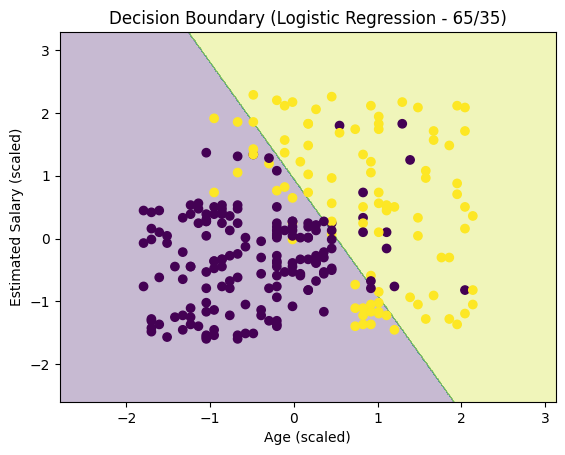

In [49]:
# Plot decision boundary (2D) for the best split.
def plot_decision_boundary(X, y, model, scaler, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.title(title)
    plt.show()
scaler, X_train_scaled, y_train = scaled_data[best_split]
model = models[best_split]

plot_decision_boundary(
    X_train_scaled,
    y_train,
    model,
    scaler,
    f"Decision Boundary (Logistic Regression - {best_split})"
)
